This is the first set of models that were run using the group as the target available. It did not prove fruitful; I received scores as low as 0.08%. 

The notebook, for the time being, remains accessible for the curious. In case anyone wonders - why I didn't classify by group, well; here's their answer. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [4]:
#A summary of missing variables represented as a percentage of the total missing content. 
def null_summary(df, print_log=False, sort='ascending'):
    s = df.isnull().sum()*100/df.isnull().count()
    
    if sort.lower() == 'ascending':
        s = s.sort_values(ascending=True)
    elif sort.lower() == 'descending':
        s = s.sort_values(ascending=False)  
    if print_log: 
        print('Percentage of null values: \n', s)
  
    return pd.Series(s)

In [5]:
#get the data
talkdata = pd.read_csv('./data/talkdata.csv')
#Quick look at the head.
talkdata.head()

,timestamp,longitude,latitude,coordinates,is_active,phone_brand,device_model,category,gender,age,group
0,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,1 free,M,35,M32-38
1,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Cozy 1,M,35,M32-38
2,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Industry tag,M,35,M32-38
3,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,Property Industry 2.0,M,35,M32-38
4,2016-05-01 14:23:37,0.0,0.0,"(0.0, 0.0)",1.0,小米,MI 2,music,M,35,M32-38


In [6]:
#The size and shape of this dataset before categorical changing.
talkdata.shape

(7832282, 11)

In [7]:
null_summary(talkdata)

timestamp       0.0
longitude       0.0
latitude        0.0
coordinates     0.0
is_active       0.0
phone_brand     0.0
device_model    0.0
category        0.0
gender          0.0
age             0.0
group           0.0
dtype: float64

This will be a classification project where in I predict the gender and age based on several categorical variables. The following feature engineering needs to be accomplished after importing the table and prior to modeling.

1. Derive the following columns from timestamp:

> Month

> DayofWeek

> Hour

2. Remove timestamp, tTime, epoch, longitude, latitude, phone_brand, gender, age
3. Set the target variable, y to the group column. Remove the target variable from the feature set. 
4. Perform a train_test split on the data. Ensure that the stratisfy parameter is set to group.
5. OneHotEncode all categorical variables.  

In [6]:
#Set the timestamp column to a datetime datatype.
talkdata['timestamp'] = pd.to_datetime(talkdata.timestamp)
talkdata.timestamp.dtype

dtype('<M8[ns]')

In [7]:
#create the categorical time columns
talkdata['hour'] = talkdata.timestamp.dt.hour
talkdata['weekday'] = talkdata.timestamp.dt.dayofweek
talkdata['week'] = talkdata.timestamp.dt.isocalendar().week

#concatenate the phone brand to the device model. 
talkdata['device_type'] = talkdata.phone_brand + " "+ talkdata.device_model
talkdata.describe(include='all', datetime_is_numeric=True)

,timestamp,longitude,latitude,coordinates,is_active,phone_brand,device_model,category,gender,age,group,hour,weekday,week,device_type
count,7832282,7.832282e+06,7.832282e+06,7832282,7.832282e+06,7832282,7832282,7832282,7832282,7.832282e+06,7832282,7.832282e+06,7.832282e+06,7.832282e+06,7832282
unique,NaN,NaN,NaN,32921,NaN,89,926,441,2,NaN,12,NaN,NaN,NaN,942
top,NaN,NaN,NaN,"(0.0, 0.0)",NaN,华为,荣耀6,Industry tag,M,NaN,M39+,NaN,NaN,NaN,华为 荣耀6
freq,NaN,NaN,NaN,2295988,NaN,2422726,354430,907153,5566437,NaN,1360719,NaN,NaN,NaN,354430
mean,2016-05-04 13:58:30.355242240,7.837463e+01,2.182485e+01,NaN,3.404700e-01,NaN,NaN,NaN,NaN,3.350478e+01,NaN,1.306016e+01,2.963128e+00,1.786502e+01,NaN
min,2016-04-30 23:52:24,-1.800000e+02,-3.380000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.100000e+01,NaN,0.000000e+00,0.000000e+00,1.700000e+01,NaN
25%,2016-05-02 20:22:46.500000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,2.700000e+01,NaN,8.000000e+00,1.000000e+00,1.800000e+01,NaN
50%,2016-05-04 14:05:48,1.127500e+02,2.857000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,3.100000e+01,NaN,1.300000e+01,3.000000e+00,1.800000e+01,NaN
75%,2016-05-06 08:22:22,1.171700e+02,3.401000e+01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,3.900000e+01,NaN,1.900000e+01,5.000000e+00,1.800000e+01,NaN
max,2016-05-08 00:00:08,1.511800e+02,5.364000e+01,NaN,1.000000e+00,NaN,NaN,NaN,NaN,8.900000e+01,NaN,2.300000e+01,6.000000e+00,1.800000e+01,NaN


In [10]:
y = talkdata.group
#drop the non-categorical columnsand the columns that are no longer in use.
#X = talkdata.drop(columns=['timestamp', 'longitude', 'latitude', 'phone_brand', 'device_model', 'age', 'gender', 'group'])
X = talkdata.drop(columns=['age', 'gender', 'group', 'coordinates'])
X.shape

(7832282, 7)

In [11]:
X.columns

Index(['timestamp', 'longitude', 'latitude', 'is_active', 'phone_brand',
       'device_model', 'category'],
      dtype='object')

# Downsample the data 

In this portion of the process I'm going to downsample the data to a range of 250k. I will use these 250k records to determine if the data is configured correctly for constructing a model that will have at least 68% accuracy. If the model cannot be constructed within these guidelines, more wranging and processing may need to be done in order to get a working model. 

I will use a train-test split with the stratisfy parameter set for this portion of the data. I will check the balance on the pair.

In [12]:
X_train, X_model, y_train, y_model = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_model.shape

(783229, 7)

In [13]:
y_train.value_counts()

M39+      1224647
M32-38    1220489
M29-31     815500
M23-26     802553
M27-28     516055
F33-42     512257
F43+       437134
M22-       430549
F29-32     331361
F24-26     263928
F23-       255876
F27-28     238704
Name: group, dtype: int64

In [14]:
y_model.value_counts()

M39+      136072
M32-38    135610
M29-31     90611
M23-26     89173
M27-28     57339
F33-42     56917
F43+       48571
M22-       47839
F29-32     36818
F24-26     29325
F23-       28431
F27-28     26523
Name: group, dtype: int64

In [16]:
#Export the training data for later use.
X_train.to_csv('./data/train_features.csv', index=False)
y_train.to_csv('./data/train_target.csv', index=False)

#Export the model data for later use. 
X_model.to_csv('./data/model_features.csv', index=False)
y_model.to_csv('./data/model_target.csv', index=False)

# Model Selection

The data has been cleaned and prepared a bit more for model slection. The first cell is for reimporting the data in the rather frequent events that the PC locks up and I have to start from scratch. I can just start my selection process from this point - rather than rerun the entire notebook.

In [17]:
#if necessary import the model data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling Imports - GridSearch
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

#Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# #Get the data:
X_model = pd.read_csv('./data/model_features.csv')
y_model = pd.read_csv('./data/model_target.csv')
#shape it up:
y_model = y_model.values.ravel()
print("Training Shapes:", X_model.shape, y_model.shape)

Training Shapes: (783229, 7) (783229,)


In [18]:
#Investigate the parameters for truncate_svd. I don't know about the number of iterations. 
enc = OneHotEncoder()
X_enc = enc.fit_transform(X_model)
tsvd = TruncatedSVD(n_components = 500) 
svd_search = tsvd.fit_transform(X_enc)

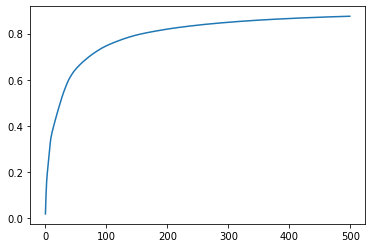

In [16]:
#Explained variance ratio on truncatedSVD. 
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.show()

In [33]:
evr = np.cumsum(tsvd.explained_variance_ratio_)
print(np.where((evr >= .70) & (evr <= .80))[0].mean())

115.5


# Searching for Models

In [21]:
#Split for validation on 20% of the data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
print("Training Shapes:", X_train.shape, y_train.shape)
print("Test Shapes: ",  X_test.shape, y_test.shape)

Training Shapes: (3132912, 7) (3132912,)
Test Shapes:  (4699370, 7) (4699370,)


# Decision Tree

In [22]:
X_train.head()

,timestamp,longitude,latitude,is_active,phone_brand,device_model,category
5013393,2016-05-03 13:51:35,0.00,0.00,0.0,华为,荣耀7,Low income
6701487,2016-05-07 22:49:55,120.74,27.97,0.0,vivo,Y33,Liquid medium
1354071,2016-05-02 15:50:23,1.00,1.00,1.0,华为,Mate 7,Custom label
158957,2016-05-02 16:21:41,117.09,37.88,0.0,华为,Ascend G700T,unknown
2796454,2016-05-01 06:18:25,98.52,39.73,0.0,三星,Galaxy A5,Industry tag


In [44]:
dt = DecisionTreeClassifier(max_depth=100)
skb = SelectKBest(k='all')
enc =  OneHotEncoder(handle_unknown='ignore')
pipeline = Pipeline([('enc', enc), 
                     ('skb', skb),
                     ('dt', dt)])
dt = pipeline.fit(X_train, y_train)

In [45]:
pred = dt.predict(X_test)

In [46]:
#How well am I predicting people under 22 and people over 42? Oh. it doesn't matter. This isn't a regresion model. 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        F23-       0.88      0.38      0.54    170584
      F24-26       0.92      0.38      0.54    175952
      F27-28       0.92      0.31      0.46    159136
      F29-32       0.88      0.39      0.54    220907
      F33-42       0.92      0.35      0.51    341504
        F43+       0.95      0.44      0.60    291423
        M22-       0.84      0.40      0.54    287033
      M23-26       0.55      0.47      0.51    535036
      M27-28       0.88      0.39      0.54    344036
      M29-31       0.69      0.47      0.56    543667
      M32-38       0.36      0.64      0.46    813660
        M39+       0.39      0.75      0.51    816432

    accuracy                           0.51   4699370
   macro avg       0.76      0.45      0.52   4699370
weighted avg       0.65      0.51      0.52   4699370



In [48]:
pipeline = Pipeline([('enc', enc), 
                     ('skb', skb),
                     ('dt', DecisionTreeClassifier())])

dtPara = {
    'dt__max_depth' : range(100, 500, 50)
}
dt_skb = GridSearchCV(pipeline, dtPara, cv=5, verbose=3)
dt_skb.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............................dt__max_depth=100; total time=12.0min
[CV 2/5] END ..............................dt__max_depth=100; total time=11.5min
[CV 3/5] END ..............................dt__max_depth=100; total time=11.6min
[CV 4/5] END ..............................dt__max_depth=100; total time=11.7min
[CV 5/5] END ..............................dt__max_depth=100; total time=12.4min
[CV 1/5] END ..............................dt__max_depth=150; total time=22.1min
[CV 2/5] END ..............................dt__max_depth=150; total time=20.1min
[CV 3/5] END ..............................dt__max_depth=150; total time=20.3min
[CV 4/5] END ..............................dt__max_depth=150; total time=19.3min
[CV 5/5] END ..............................dt__max_depth=150; total time=21.2min
[CV 1/5] END ..............................dt__max_depth=200; total time=30.6min
[CV 2/5] END ..............................dt__ma

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('enc',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('skb', SelectKBest(k='all')),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': range(100, 500, 50)}, verbose=3)

In [49]:
dt_skb.best_estimator_

Pipeline(steps=[('enc', OneHotEncoder(handle_unknown='ignore')),
                ('skb', SelectKBest(k='all')),
                ('dt', DecisionTreeClassifier(max_depth=450))])

In [50]:
pred = dt_skb.predict(X_test)
#How well am I predicting people under 22 and people over 42? Oh. it doesn't matter. This isn't a regresion model. 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        F23-       0.98      0.82      0.89    170584
      F24-26       0.98      0.80      0.88    175952
      F27-28       0.98      0.81      0.89    159136
      F29-32       0.96      0.79      0.87    220907
      F33-42       0.91      0.79      0.84    341504
        F43+       0.99      0.82      0.90    291423
        M22-       0.93      0.82      0.87    287033
      M23-26       0.84      0.85      0.85    535036
      M27-28       0.96      0.83      0.89    344036
      M29-31       0.95      0.83      0.89    543667
      M32-38       0.74      0.89      0.81    813660
        M39+       0.73      0.91      0.81    816432

    accuracy                           0.85   4699370
   macro avg       0.91      0.83      0.87   4699370
weighted avg       0.87      0.85      0.85   4699370



# Classification - Age Prediction

# RandomForest Regressor
I've got a good-looking, bad decision tree.

How does he do in a forest?

In [58]:
#if necessary import the model data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
#Modeling Imports - GridSearch
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV

#Models
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Unsupervised Models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import fowlkes_mallows_score

#validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [115]:
#max_depth
md = [100,50]
#n_estimators
ne = [100, 50]  

In [118]:
#First run for model selection on 250k records. It takes less than a minute to fit on five estimators. 
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('enc', enc), 
                     ('skb', SelectKBest()),
                     ('rf', RandomForestRegressor())])

rfPara = {#'rfc__criterion': cn,
           #'rfc__max_features': mf,
           #'rfc__oob_score':[True, False],
           'skb__k' : [100, 500, 600],
           'rf__max_depth': md ,
           'rf__n_estimators': ne
          }
rfg_skb = GridSearchCV(pipeline, rfPara, cv=5, verbose=3)
rfg_skb.fit(age_train, agey_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=100, score=0.133, total= 2.4min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=100 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=100, score=0.132, total= 2.4min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=100 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=100, score=0.133, total= 2.4min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=100 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=100, score=0.131, total= 2.4min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=100 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=100, score=0.137, total= 2.5min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=500 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=500, score=0.236, total=20.6min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=500 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=500, score=0.237, total=20.7min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=500 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=500, score=0.236, total=20.8min
[CV] rf__max_depth=100, rf__n_estimators=100, skb__k=500 .............
[CV]  rf__max_depth=100, rf__n_estimators=100, skb__k=500,

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 562.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('enc',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('skb', SelectKBest()),
                                       ('rf', RandomForestRegressor())]),
             param_grid={'rf__max_depth': [100, 50],
                         'rf__n_estimators': [100, 50],
                         'skb__k': [100, 500, 600]},
             verbose=3)

In [119]:
print(f"best score: {rfg_skb.best_score_}. \n best estimator: {rfg_skb.best_estimator_}") 

best score: 0.24073858021869507. 
 best estimator: Pipeline(steps=[('enc', OneHotEncoder(handle_unknown='ignore')),
                ('skb', SelectKBest(k=600)),
                ('rf', RandomForestRegressor(max_depth=100, n_estimators=50))])


In [120]:
pred = rfg_skb.predict(age_test)

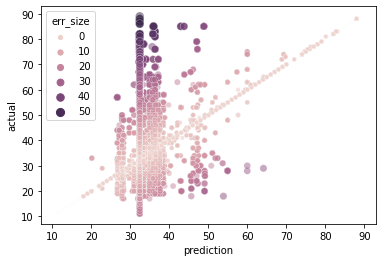

In [121]:
errs = error_table(pred, agey_test)
#Provides a visualization of the errors vs. predictions (residual plot)
#Perfection!
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()